# TERM-PROJECT_Proposal

# 비트코인의 역사적 가격 조회와 당시 추세 분석

<div style="text-align: right"> 웹/파이썬프로그래밍 00분반 </div>

<div style="text-align: right"> 인공지능학과 2022105802 추힘찬 </div>

### (1) 주제 선정 이유

사람들이 투자할 때 가장 중요하게 생각하는 것은 역사적으로 차트가 어떻게 변해왔는가를 통해 앞으로의 가격을 예측하는 것이다. 따라서 이번 프로젝트를 통해서 과거의 비트코인 가격이 어떻게 변해왔고, 궁금한 날을 직접 검색해 당시 장 분위기가 어땠는지 알려주는 프로그램을 만들 것이다.

### (2) 주제 정의
    
가장 최근인 2021년까지의 비트코인 가격 데이터가 들어있는 파일을 다운 받고, 데이터 가공을 통해 사용자가 보기 편하게 코드를 짜서 최대한 사용자가 보기 편하도록 만들 것이다.

1. 2012.01.01~2021.12.31까지 날짜를 검색한다.
2. 시가, 종가, 고가, 저가를 제시해준다.
3. 당일 변화율에 따른 상승, 횡보, 하락을 판단하고
4. 과거 20일 평균 가격을 통해 단기 추세를 분석해준다. (20일 이동 평균선)
5. 과거 99일 평균 가격을 통해 장기 추세를 분석해준다. (99일 이동 평균선)

### (3) 인터넷을 통한 데이터 획득
    
Kaggle, Bitcoin Historical Data : https://www.kaggle.com/datasets/raihansoniwala/btc-10-years-price-data-20122021

여기에 있는 csv 파일을 다운 받아서, bitcoin.csv 이라는 파일 이름으로 바꾸고, 그 파일을 가공해줬다.


### (4) 분석을 위한 데이터의 가공

Kaggle사이트에서 csv파일을 받아서, 원하는 날짜를 입력하면 시작, 종료, 최고, 최저가를 분석하여 그 날의 변화율과 상승, 횡보, 하락 추세를 나타내주어
사람들이 당시 추세가 어떤지 대략적으로 분석하여 투자에 대한 정보를 제공하고 참고할 수 있도록 프로그램을 만들 것이다.

(2)번의 3번은 ±0.7%기준으로 횡보, 상승, 하락을 분석해주고, 4, 5번은 ±2%을 기준으로 상승, 하락, 횡보장을 판단해주어 사람들이 자세한 분석 없이도 간편하게 이해할 수 있도록 할 것이다.

### (5) 분석 결과 도출

(코드 원본)

In [ ]:
#pip install matplotlib

2012년부터 2021년까지 입력 가능합니다.
원하는 날짜를 입력하세요 (예시:2012.01.01) :  2020.12.25
시가 : 23728.7 USD
종가 : 24689.6 USD
고가 : 24778.9 USD
저가 : 23445.3 USD
거래량 : 2400 btc
변화율 : 상승,  4.02 %
20일 평균 가격 : 21062.425 USD
단기 추세: 상승장
99일 평균 가격 : 15395.984 USD
장기 추세: 상승장


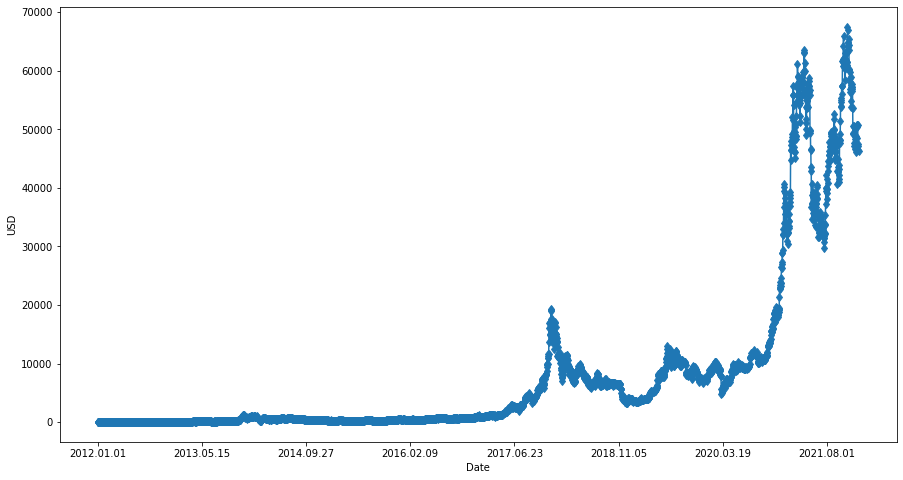

In [1]:
import requests
import csv
import pandas as pd
import numpy as np
import os


print("2012년부터 2021년까지 입력 가능합니다.")
date = input()
print("원하는 날짜를 입력하세요 (예시:2012.01.01) : ", date)
df = pd.read_csv('bitcoin.csv')

find_row = df.loc[df['Date'].str.contains(date, na=False)]

print('시가 :', float(find_row['Open']), 'USD')
print('종가 :', float(find_row['Price']), 'USD')
print('고가 :', float(find_row['High']), 'USD')
print('저가 :', float(find_row['Low']), 'USD')
print('거래량 :', int(find_row['Vol']), 'btc')

#%에 따른 하루 변화율
if (float(find_row['Change %']) <= 0.7 and float(find_row['Change %']) >= -0.7):
    print('변화율 : 횡보, ', float(find_row['Change %']), '%')
elif (float(find_row['Change %']) > 0.7):
    print('변화율 : 상승, ', float(find_row['Change %']), '%')
elif (float(find_row['Change %']) < -0.7):
    print('변화율 : 하락, ', float(find_row['Change %']), '%')

#1차. 단기 추세가 존재할 때 (2012.01.21~)
if np.array(find_row.index.tolist()) >= 20:
    sum1 = 0
    sum2 = 0
    i1 = 1
    i2 = 1
    count = 20

    for i1 in range(count):
        sum1 += float(df['Price'].loc[np.array(find_row.index.tolist()) - np.array(i1)])
    
    short_reverage = sum1 / 20
    
    print('20일 평균 가격 :', round(short_reverage, 3), 'USD')
    
    if (short_reverage < float(find_row['Price'])*0.98):
        print('단기 추세: 상승장')
    elif (short_reverage > float(find_row['Price'])*0.98 and short_reverage < float(find_row['Price'])*1.02):
        print('단기 추세: 횡보장')
    elif (short_reverage > float(find_row['Price'])*1.02):
        print('단기 추세: 하락장')

        
    #단기는 존재하지만 장기는 없을 때 (2012.01.21~2012.04.08)
    if np.array(find_row.index.tolist()) < 100:
        print('장기 추세가 존재하지 않습니다')
    
    #장기 추세가 존재할 때 (2012.04.09~)
    else:
        count = 99
        
        for i2 in range(count):
            sum2 += float(df['Price'].loc[np.array(find_row.index.tolist()) - np.array(i2)])

        long_reverage = sum2 / 99
        
        print('99일 평균 가격 :', round(long_reverage, 3), 'USD')

        if (long_reverage < float(find_row['Price'])*0.98):
            print('장기 추세: 상승장')
        elif (long_reverage > float(find_row['Price'])*0.98 and long_reverage < float(find_row['Price'])*1.02):
            print('장기 추세: 횡보장')
        elif (long_reverage > float(find_row['Price'])*1.02):
            print('장기 추세: 하락장')

#2012.01.01~2012.01.20
elif np.array(find_row.index.tolist()) < 20:
    print('장, 단기 추세가 존재하지 않습니다')

#그래프
#기본적으로 안열릴 수 있으니, 주석처리
#pip install matplotlib 하면 그래프 보임
# import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 8))
# plt.rcParams.update({'font.size': 10})
# ax = df.set_index('Date')['Price'].plot(kind='line', marker='d')
# ax.set_ylabel("USD")
# ax.set_xlabel("Date")
# plt.show()


+추가 :
    맨 아래 코드 주석을 지우고, (5)번 바로 아래의 주석을 지운 뒤 pip install matplotlib을 실행 시켜주면 csv파일에 적힌 데이터를 이해하기 쉽게 그림으로 볼 수 있다.

### (6) 결론
(2)번 항목과 (4)번 항목에 나온 대로 데이터 가공을 했고, 원하는 대로 보기 편하게 결과 값이 제대로 나왔다.
그래프를 그리게 되면 아래와 같이 그래프가 출력된다. (사진은 코드에 출력된 그래프 캡처한 것)

![GraphCapture](./GraphCapture.png)

### (7) 참고문헌

(3)번의 링크에서 csv 파일만 받아서 참고하고 원하는 대로 짰다.
+ 모르는 문법들 구글링

### (8) 별첨

(3)번 링크에 나와있는 csv 파일이 원본 파일이다.

### (9) 별첨

함께 첨부한 bitcoin.csv 파일이 직접 가공한 데이터 파일이다.

### (10) 별첨

(5)번에 첨부되어 있는 코드가 코드 원본이다.